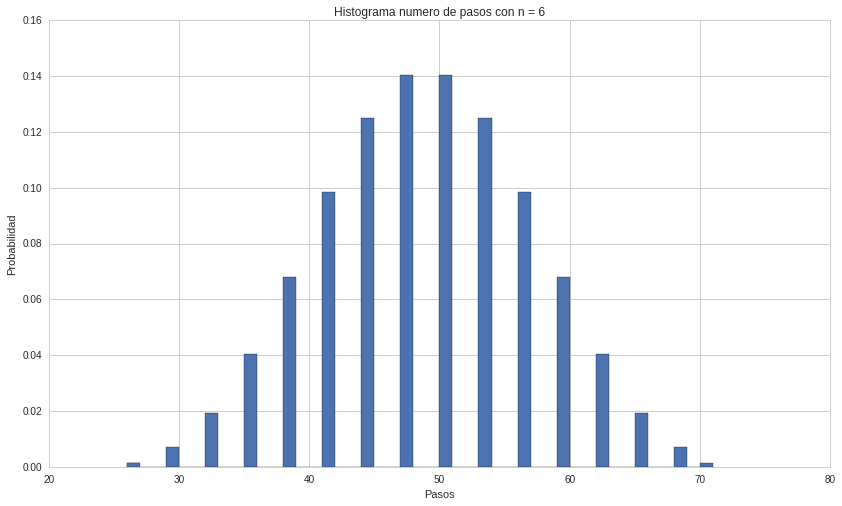


Numero promedio de pasos: 48.5

Minimo numero de pasos: 26.0

Maximo numero de pasos: 71.0


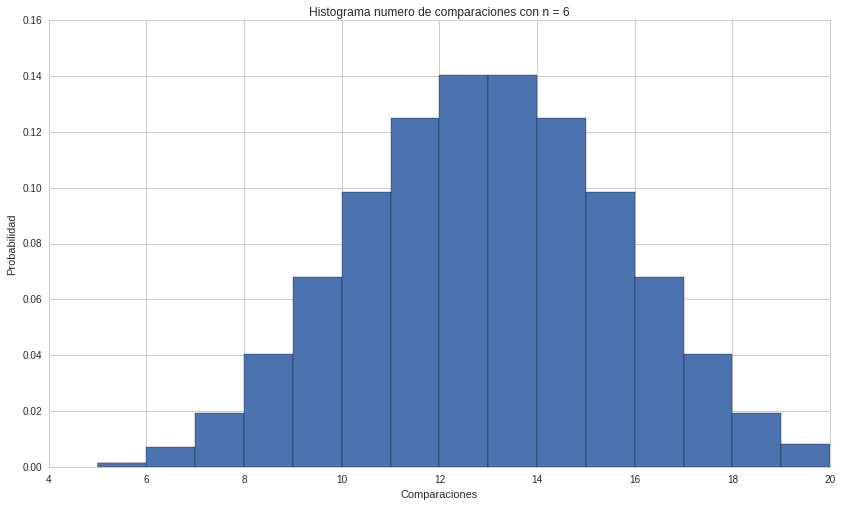


Numero promedio de comparaciones: 12.5

Minimo numero de comparaciones: 5.0

Maximo numero de comparaciones: 20.0


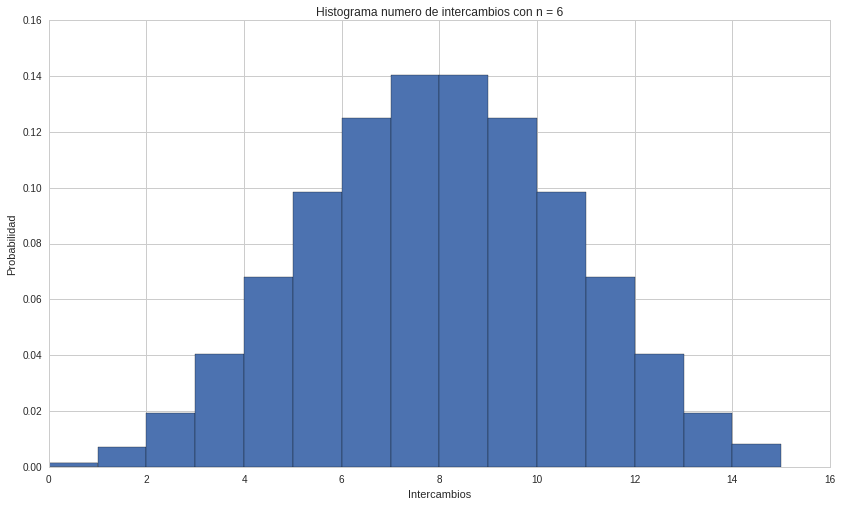


Numero promedio de intercambios: 7.5

Minimo numero de comparaciones: 0.0

Maximo numero de comparaciones: 15.0


In [44]:
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt

def insertionSortCounter(arreglo,largoArreglo):
	#inicializacion de contadores
    numeroPasos = 0
    numeroComparaciones = 0
    numeroIntercambios = 0
	
	#Se crea arreglo igual de largo al arreglo parametro y de tipo entero
    array=np.zeros(largoArreglo,dtype=int)
    i = 1
    while(i<largoArreglo):
        aux = arreglo[i]
        j=i-1
        while(True):
            numeroComparaciones+=1		#La  comparacion de haber entrado al while
            array[i]+=1
            if(j<0):
				break
            if(aux>=arreglo[j]):
				break
            numeroIntercambios+=1		#El intercambio del anterior con el siguiente
            arreglo[j+1]=arreglo[j]
            j-=1;numeroPasos+=3
        arreglo[j+1]=aux;numeroPasos+=1;
        i+=1;numeroPasos+=4
    numeroPasos+=1
    return arreglo,numeroPasos,numeroComparaciones,numeroIntercambios,array

class Permutacion:
    def __init__(self):
        self.arreglo = [] #Contiene las permutaciones
        self.used = [0]*100 #Máximo 100 permutaciones 
        self.posicionActual=0
        self.permutacion=[]
		
    def permutacionesAuxiliares(self,n):
        if(self.posicionActual==n):
            self.arreglo.append(list(self.permutacion))
            return
        self.posicionActual+=1        
        for i in range(n):
            if(self.used[i]==1): 
				continue
            self.used[i]=1;self.permutacion.append(i);
            self.permutacionesAuxiliares(n)
            self.used[i]=0;self.permutacion.pop()
        self.posicionActual-=1
    
    def permutations (self,n):
        self.__init__()
        self.permutacionesAuxiliares(n)
        return self.arreglo
    
def counter(metodo,**kwargs):	#kwargs permite traer argumentos sin nombre definido aun
    n = kwargs.get('n',None)	#Numero de permutaciones, se revisa el argumento
    permutacion = []
    numeroPermutaciones = 0
    if(metodo==0):  #Metodo de itertools
        permutacion = np.array(list(itertools.permutations(range(n)))) #Creacion de permutacion por itertools
        numeroPermutaciones = len(permutacion)
    elif(metodo==1): #Método funcion recursiva
        e = Permutacion()				#Instanciacion de objeto Permutacion
        permutacion = e.permutations(n)	#Inicializacion de objeto Permutacion y creacion de permutaciones
        numeroPermutaciones = len(permutacion)
	
	#np.empty crea un vector del tamano especificado pero sin inicializar, entonces tiene basura en sus indices
    pasos = np.empty(numeroPermutaciones)			#Creacion arreglo para numero de pasos
    comparaciones = np.empty(numeroPermutaciones)	#Creacion arreglo para numero de comparaciones
    intercambios = np.empty(numeroPermutaciones)	#Creacion arreglo para numero de intercambios
    for i in range (numeroPermutaciones):
        arregloAuxOrdenar = np.copy(permutacion[i])
        arreglo,numeroPasos,numeroComparaciones,numeroIntercambios,array = insertionSortCounter(arregloAuxOrdenar,n)
        pasos[i]=numeroPasos
        comparaciones[i]=numeroComparaciones
        intercambios[i]=numeroIntercambios
    return pasos,comparaciones,intercambios,permutacion,numeroPermutaciones

def histogramaPasos(pasos,numeroPermutaciones,n):
    min_numeroPasos,max_numeroPasos=min(pasos), max(pasos)								#Obtener los extremos del histograma
    plt.hist(pasos, bins=np.arange(min_numeroPasos,max_numeroPasos + 1, 1), normed=1)	#Crear histograma
    plt.title("Histograma numero de pasos con n = "+str(n))									#Añadir titulo al histograma
    plt.xlabel('Pasos')														#Añadir label a eje x
    plt.ylabel('Probabilidad')															#Añadir label a eje y
    plt.show()																			
    
    #Imprimir datos
    vals,counts = np.unique(pasos,return_counts=True)
    print("\nNumero promedio de pasos: "+str(np.average(pasos)))
    print("\nMinimo numero de pasos: "+str(min_numeroPasos))
    print("\nMaximo numero de pasos: "+str(max_numeroPasos))
    
def histogramaComparaciones(comparaciones,numeroPermutaciones,n):
    min_numeroPasos,max_numeroPasos=min(comparaciones), max(comparaciones)						#Obtener los extremos del histograma
    plt.hist(comparaciones, bins=np.arange(min_numeroPasos,max_numeroPasos + 1, 1), normed=1)	#Crear histograma
    plt.title("Histograma numero de comparaciones con n = "+str(n))									#Añadir titulo al histograma
    plt.xlabel('Comparaciones')																	#Añadir label a eje x
    plt.ylabel('Probabilidad')																	#Añadir label a eje y
    plt.show()

    #Imprimir datos
    vals,counts = np.unique(comparaciones,return_counts=True)
    print("\nNumero promedio de comparaciones: "+str(np.average(comparaciones)))
    print("\nMinimo numero de comparaciones: "+str(min_numeroPasos))
    print("\nMaximo numero de comparaciones: "+str(max_numeroPasos))
        
def histogramaIntercambios(intercambios,numeroPermutaciones,n):
    min_numeroPasos,max_numeroPasos=min(intercambios), max(intercambios)						#Obtener los extremos del histograma
    plt.hist(intercambios, bins=np.arange(min_numeroPasos,max_numeroPasos + 1, 1), normed=1)	#Crear histograma
    plt.title("Histograma numero de intercambios con n = "+str(n))								#Añadir titulo al histograma
    plt.xlabel('Intercambios')																	#Añadir label a eje x
    plt.ylabel('Probabilidad')																	#Añadir label a eje y
    plt.show()
    
	#Imprimir datos
    vals,counts = np.unique(intercambios,return_counts=True)
    print("\nNumero promedio de intercambios: "+str(np.average(intercambios)))
    print("\nMinimo numero de comparaciones: "+str(min_numeroPasos))
    print("\nMaximo numero de comparaciones: "+str(max_numeroPasos))
        
#Programa principal: para usar itertools poner 0 en counter, para usar recursion poner 1 en counter
nPermRequired = 6 
pasos,comparaciones,intercambios,permutacion,numeroPermutaciones = counter(0,n=nPermRequired)
histogramaPasos(pasos,numeroPermutaciones,nPermRequired)
histogramaComparaciones(comparaciones,numeroPermutaciones,nPermRequired)
histogramaIntercambios(intercambios,numeroPermutaciones,nPermRequired)
